In [1]:
from pylab import * #Pour tranformer python en une calculette scientifique
from scipy import misc #Pour lire les images

# Traitement d'une image par un réseau de neurones, modèle du perceptron


Le perceptron est pensé comme un modèle pour un seul neurone, qui reçoit une certaine entrée et réagit en fonction de cette entrée. Ici, l'entrée est une image, donc conceptuellement le neurone reçoit l'information d'autres neurones spécialisés de la rétine.


## Chargement et représentation des images

Chaque image compte 50 * 50 pixels

On commence par quelques fonctions pour charger et tracer les images

In [2]:
def cv_image_vers_vecteur(image): #Pour convertir une image en vecteur, cela servira pour les opérations suivantes
    return ravel(image)

def charge_l_image(nom_de_fichier):
    return misc.imread(nom_de_fichier, flatten=True, mode = "L")/255.

def charge_l_image_sous_forme_de_vecteur(nom_de_fichier):
    return cv_image_vers_vecteur(charge_l_image(nom_de_fichier))

def charge_l_image_et_trace(nom_de_fichier_complet):
    imshow(charge_l_image(nom_de_fichier_complet))
    show()


In [3]:
charge_l_image("training_set_perceptron/A1.png")

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


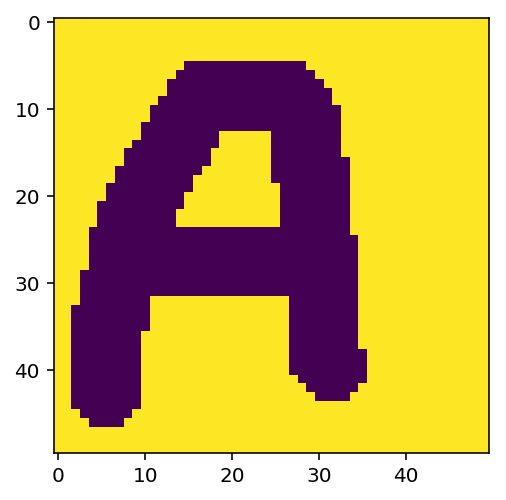

In [4]:
charge_l_image_et_trace("training_set_perceptron/A1.png")

In [5]:
shape(charge_l_image("training_set_perceptron/A1.png")) #50 * 50 pixels

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(50, 50)

## Création de l'ensemble d'entrainement

On veut créer un neurone qui donne +1 lorsqu'on lui donne A et -1 lorsqu'on lui donne B.

On commence par collecter tous les A et tous les B qui vont servir d'exemple, puis on leur donne le score correspondant.

In [6]:
import os
noms_des_images_d_entrainement = os.listdir("training_set_perceptron")
noms_contenant_A = ["training_set_perceptron/" + nom for nom in noms_des_images_d_entrainement if "A" in nom]
noms_contenant_B = ["training_set_perceptron/" + nom for nom in noms_des_images_d_entrainement if "B" in nom]

In [7]:
ensemble_d_entrainement = dict([(nom, 1) for nom in noms_contenant_A] + [(nom, -1) for nom in noms_contenant_B]) #On crée un dictionnaire qui contient les exemples et leur score

In [8]:
ensemble_d_entrainement

{'training_set_perceptron/A1.png': 1,
 'training_set_perceptron/A2.png': 1,
 'training_set_perceptron/A3.png': 1,
 'training_set_perceptron/A4.png': 1,
 'training_set_perceptron/A5.png': 1,
 'training_set_perceptron/B1.png': -1,
 'training_set_perceptron/B2.png': -1,
 'training_set_perceptron/B3.png': -1,
 'training_set_perceptron/B4.png': -1,
 'training_set_perceptron/B5.png': -1}

Si on veut voir toutes les images dans l'ensemble d'entrainement, on peut le faire comme ça:

In [9]:
# for ex in ensemble_d_entrainement.keys():
#     charge_l_image_et_trace(ex)

## Traitement de l'image par le neurone

Le neurone prend l'image sous la forme d'un vecteur en entrée, le multiplie par ses poids et regarde le signe du résultat.

L'image d'entrée est bicolore, formée de 50 pixels. On peut donc représenter l'image par des 0 et des 1 pour chacune des couleurs, on peut la transformer en un vecteur de taille 2500 contenant des 0 et des 1.

Si on appelle $\left(x_{i}\right)_{[[1,2500]]}$ le vecteur d'exemple, $\left(w_{i}\right)_{[[1,2500]]}$ les poids du neurone, et $y$ le résultat du traitement, alors le traitement de l'image par le neurone peut s'écrire en équations:

$$
\begin{equation}
y = signe( \sum_{i=1}^{2500} w_i x_i )
\end{equation}
$$


In [9]:
def traite_image_par_neurone(vecteur, poids):
    somme = sum(vecteur * poids)
    signe = sign(somme)
    return signe

On peut voir qu'en donnant des poids aléatoires positifs ou négatifs, on obtient une réponse différente lorsque le neurone traite l'image.

In [10]:
traite_image_par_neurone(charge_l_image_sous_forme_de_vecteur("training_set_perceptron/A1.png"), rand(50*50))

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


1.0

In [11]:
traite_image_par_neurone(charge_l_image_sous_forme_de_vecteur("training_set_perceptron/A1.png"), -rand(50*50))

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


-1.0

# Entrainement du neurone

On rappelle les étapes principales:

- On commence par choisir des poids initiaux au hasard  
- Pour chaque exemple de notre ensemble d'entrainement:
    - on calcule le score prédit étant donné les poids actuels, le score qu'on aurait du trouver et l'erreur qui est la différence entre ces deux grandeurs
    - On met à jour les poids:   
    nouveaux poids = poids actuels + erreur * entrée, 
    - Et on recommence

Soit en équations:

Si les poids actuels sont $\left(w_i(t) \right)_{i\in [[0, 2500]]}$, les poids mis à jour $w_i(t+1)$, le score de l'exemple $k$ est $s_k$, la prédiction du neurone $y_k$ et l'exemple $k$ vectorisé est sous la forme  $x_{i,k}$, alors:

$$
w_i(t+1) = w_i(t) + (s_k - y_k)  x_{i,k}
$$

Quand s'arreter ?

Un critère peut etre de regarder quand le neurone cesse de progresser, c'est à dire que les erreurs qu'il fait cessent de diminuer.


In [12]:
def regle_de_mise_a_jour_des_poids(entree, objectif, poids_actuels, prediction):
    nouveaux_poids = poids_actuels + (objectif-prediction) * entree
    return nouveaux_poids

In [13]:
def nouveaux_poids_et_erreur(item_entrainement, ensemble_d_entrainement, poids_actuels): #Pour un exemple et des poids donnés, calcule les nouveaux poids après avoir appris de cet exemple
    entree = charge_l_image_sous_forme_de_vecteur(item_entrainement)
    objectif = ensemble_d_entrainement[item_entrainement]
    prediction = traite_image_par_neurone(entree, poids_actuels)
    erreur = prediction - objectif
    return regle_de_mise_a_jour_des_poids(entree, objectif, poids_actuels, prediction), erreur


Test de notre fonction

In [14]:
nouveaux_poids_et_erreur("training_set_perceptron/A1.png", ensemble_d_entrainement, rand(50*50))

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(array([ 0.56870624,  0.64361151,  0.35640106, ...,  0.93043341,
         0.53042046,  0.20296317]), 0.0)

Maintenant une fonction pour tout l'apprentissage, on part d'un exemple aléatoire et on fait un nombre donné d'itérations. En sortie on obtiendra les poids finaux et l'évolution de l'erreur

In [15]:
from itertools import cycle #pour circuler dans les exemples en boucle
def entraine_le_neurone(ensemble_d_entrainement, nbr_iterations):
    
    items_entrainement = cycle(ensemble_d_entrainement.keys())
    taille_entree = len(charge_l_image_sous_forme_de_vecteur(next(items_entrainement)))
#     poids = rand(taille_entree)
    poids = [0] * taille_entree
    
    erreur = [None] * nbr_iterations
    
    for i in range(nbr_iterations):
        poids, erreur[i] = nouveaux_poids_et_erreur(next(items_entrainement), ensemble_d_entrainement, poids) 
    
    return poids, erreur

poids_finaux, erreurs = entraine_le_neurone(ensemble_d_entrainement, 100)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Comment s'est passé l'apprentissage ?

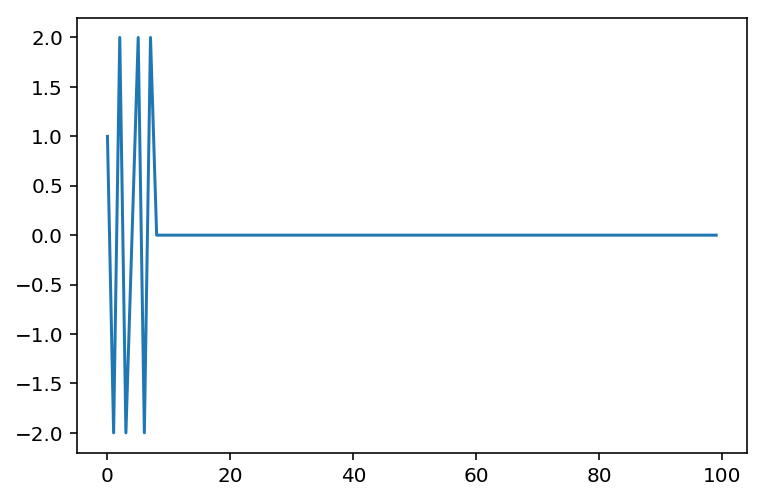

In [16]:
plot(erreurs)
show()

On voit qu'après 20 itérations le système a fini d'évoluer.

Quel est maintenant le résultat de l'entrainement ? On peut regarder les poids finaux du neurone:

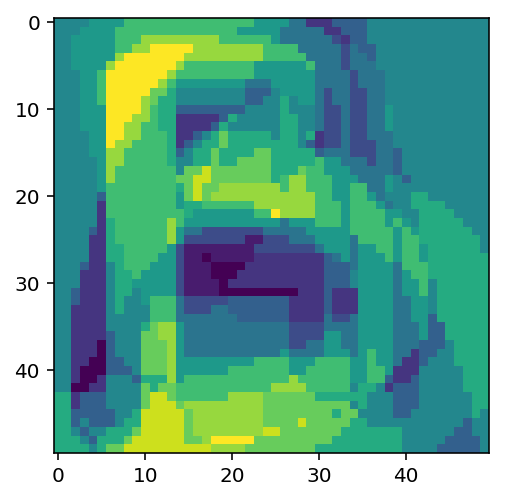

In [17]:
imshow(reshape(poids_finaux, [50, 50]))
show()

Qu'en pensez-vous ?

# Test de reconnaissance d'image

In [18]:
def classifie_l_image(chemin_vers_l_image, poids):
    im = misc.imread(chemin_vers_l_image, flatten=True, mode = "L")
    reponse = traite_image_par_neurone(cv_image_vers_vecteur(im), poids)
    if reponse == 1:
        print("L'image est un A")
    else:
        print("L'image est un B")
        
def trace_et_classifie_l_image(chemin_vers_l_image, poids):
    charge_l_image_et_trace(chemin_vers_l_image)
    classifie_l_image(chemin_vers_l_image, poids)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


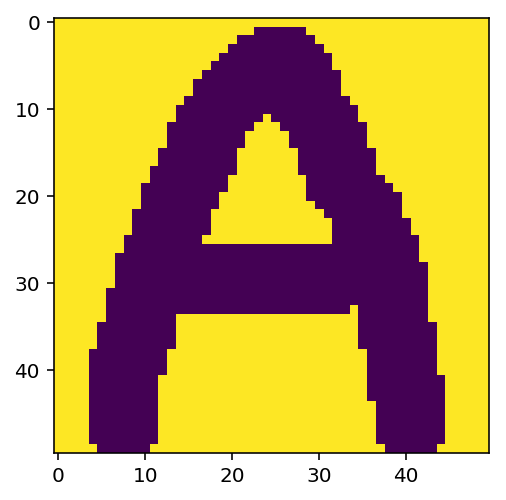

L'image est un A


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


In [19]:
trace_et_classifie_l_image("test_set_perceptron/test1.png", poids_finaux)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


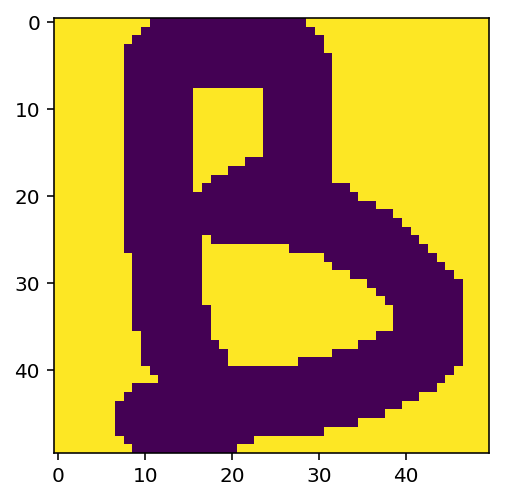

L'image est un B


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


In [20]:
trace_et_classifie_l_image("test_set_perceptron/test2.png", poids_finaux)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


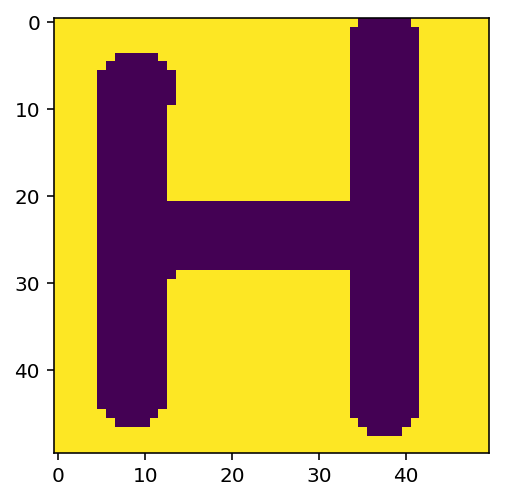

L'image est un B


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


In [21]:
trace_et_classifie_l_image("test_set_perceptron/test3.png", poids_finaux)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


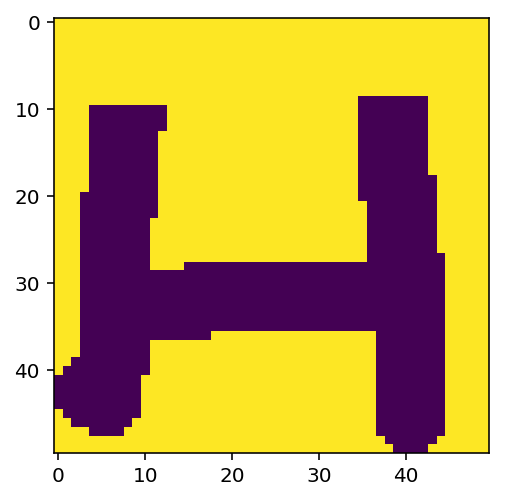

L'image est un A


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


In [22]:
trace_et_classifie_l_image("test_set_perceptron/test4.png", poids_finaux)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


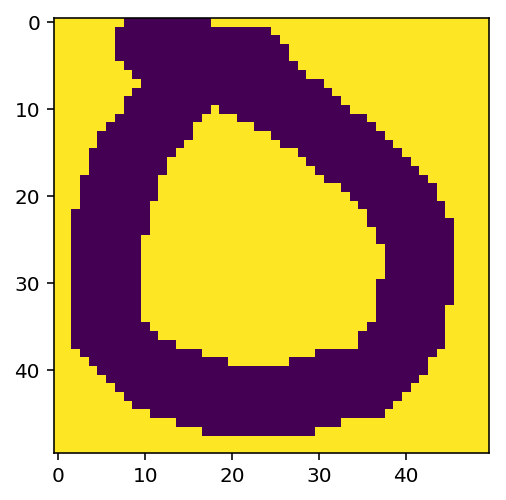

L'image est un B


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


In [23]:
trace_et_classifie_l_image("test_set_perceptron/test5.png", poids_finaux)

Essayez de dessiner une image qui va donner un A, et une image qui va donner un B